<a href="https://colab.research.google.com/github/john-d-noble/callcenter/blob/main/CB_Step_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


After Filling - Missing Dates Check:
No missing dates after filling.
Data Shape: (978, 14)

Data Types:
 date               object
calls               int64
^VIX_close        float64
SPY_close         float64
SPY_volume        float64
QQQ_close         float64
QQQ_volume        float64
DX-Y.NYB_close    float64
GC=F_close        float64
GC=F_volume       float64
BTC-USD_close     float64
BTC-USD_volume      int64
ETH-USD_close     float64
ETH-USD_volume      int64
dtype: object

Summary Statistics for Calls:
 count      978.000000
mean      8213.038855
std       2548.553633
min       2136.000000
25%       6399.250000
50%       8029.000000
75%       9748.000000
max      24724.000000
Name: calls, dtype: float64

Missing Values:
 date              0
calls             0
^VIX_close        2
SPY_close         2
SPY_volume        2
QQQ_close         2
QQQ_volume        2
DX-Y.NYB_close    2
GC=F_close        2
GC=F_volume       2
BTC-USD_close     0
BTC-USD_volume    0
ETH-USD_close     0
ET

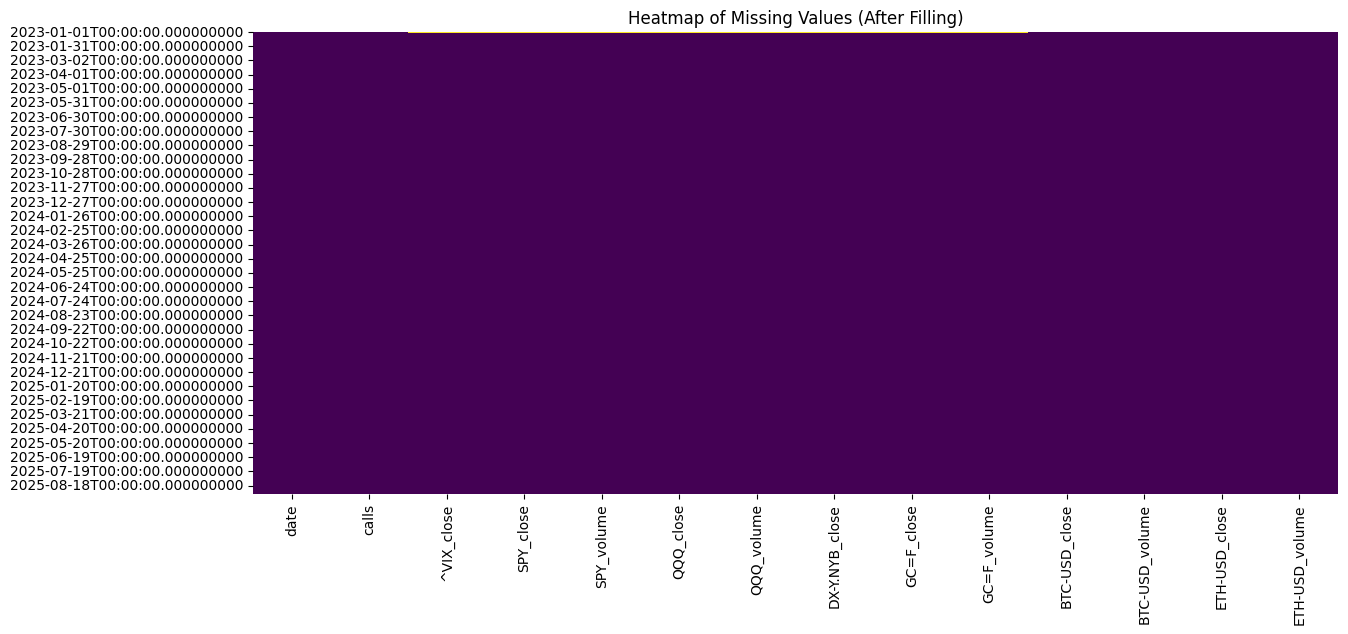

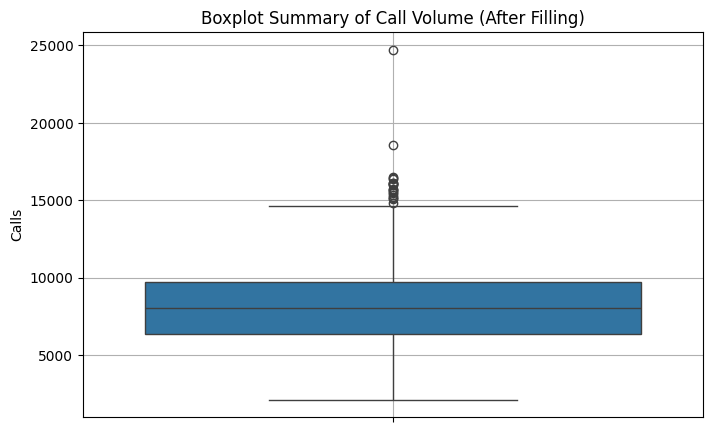

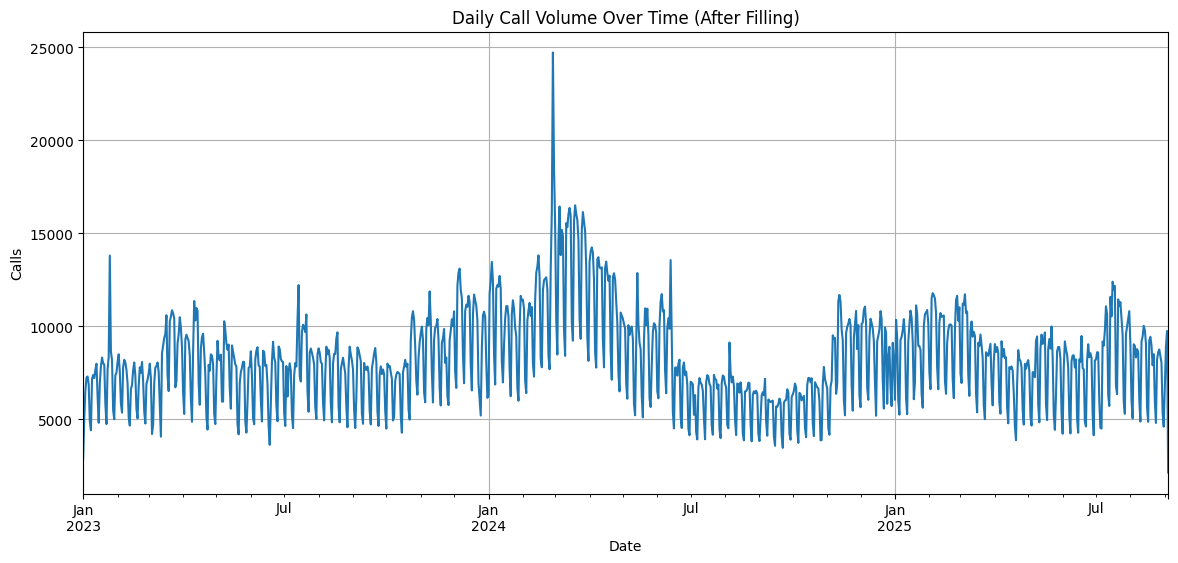

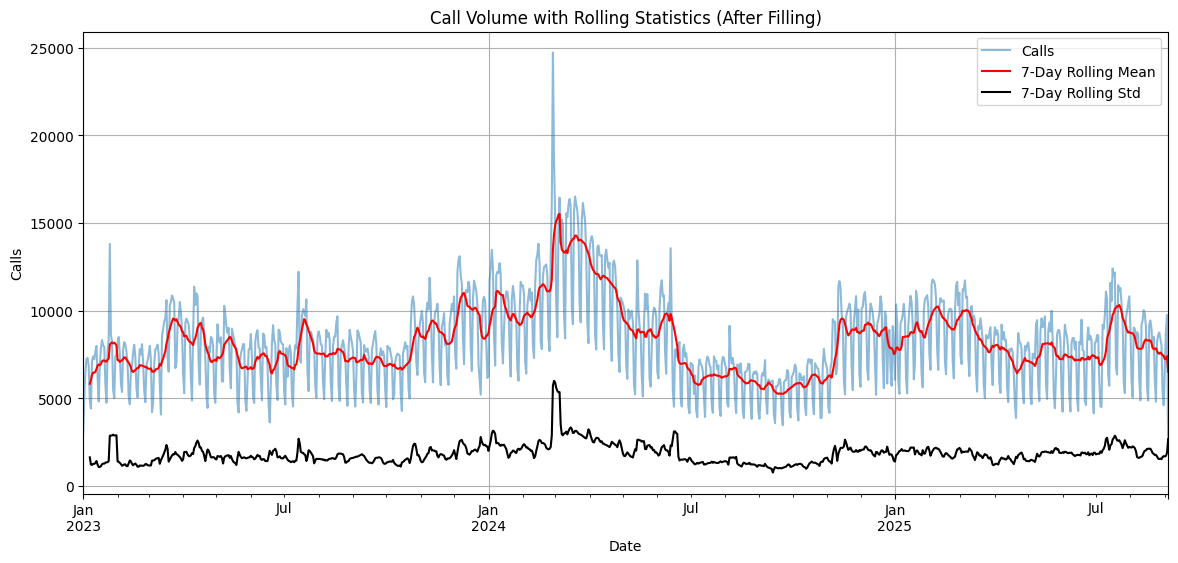

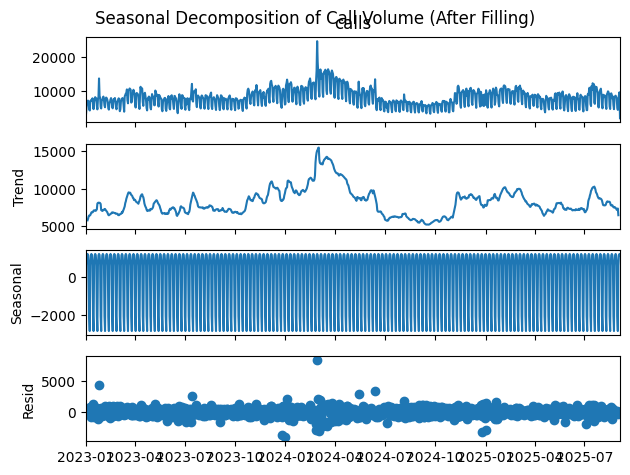

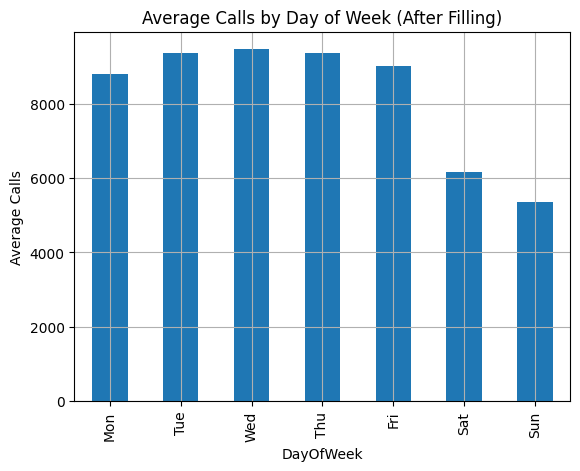

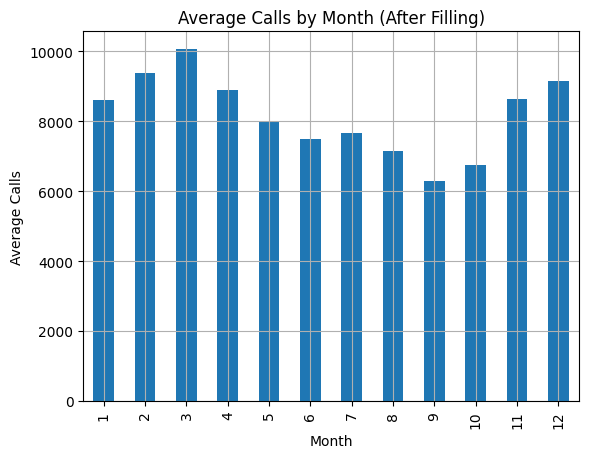

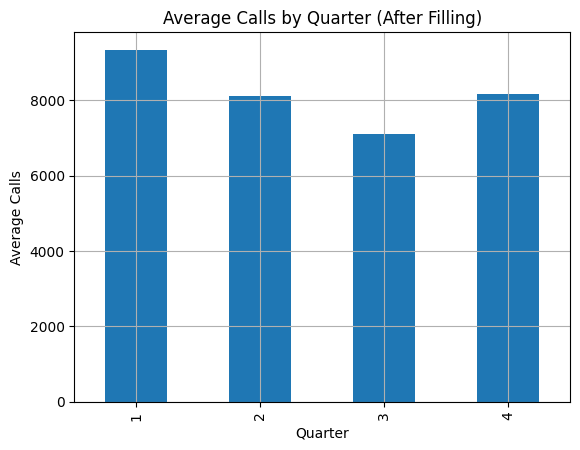

<Figure size 1400x600 with 0 Axes>

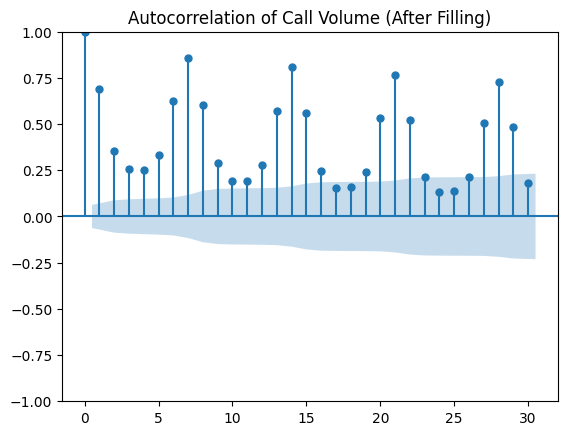

<Figure size 1400x600 with 0 Axes>

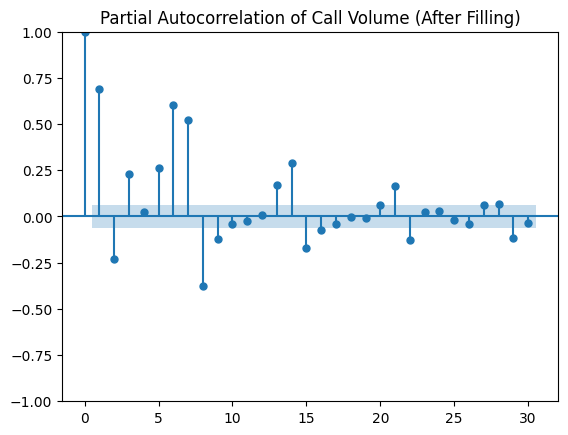


ADF Statistic: -2.3793037628942844
p-value: 0.14766316872335333
Critical Values: {'1%': np.float64(-3.4372087295925664), '5%': np.float64(-2.8645680048962348), '10%': np.float64(-2.5683822785402914)}
Series is non-stationary (fail to reject null hypothesis)

ADF on Differenced Series: -7.994919598635374
p-value: 2.4186284586159634e-12


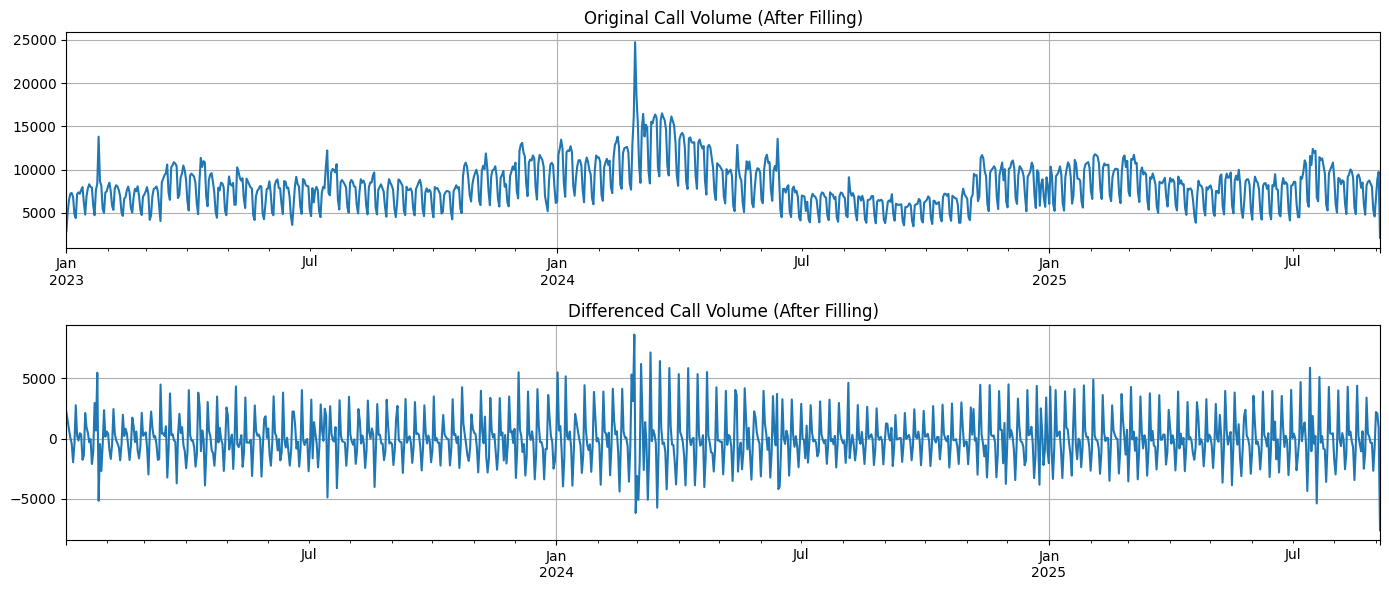


Correlations with Calls:
 calls             1.000000
BTC-USD_volume    0.394923
ETH-USD_volume    0.333965
ETH-USD_close     0.260757
DX-Y.NYB_close    0.148241
BTC-USD_close     0.102121
QQQ_close         0.046087
GC=F_volume       0.027737
SPY_close         0.018751
SPY_volume       -0.029333
QQQ_volume       -0.041188
GC=F_close       -0.070442
^VIX_close       -0.186119
Month            -0.205178
Quarter          -0.221366
DayOfWeek        -0.484000
Name: calls, dtype: float64


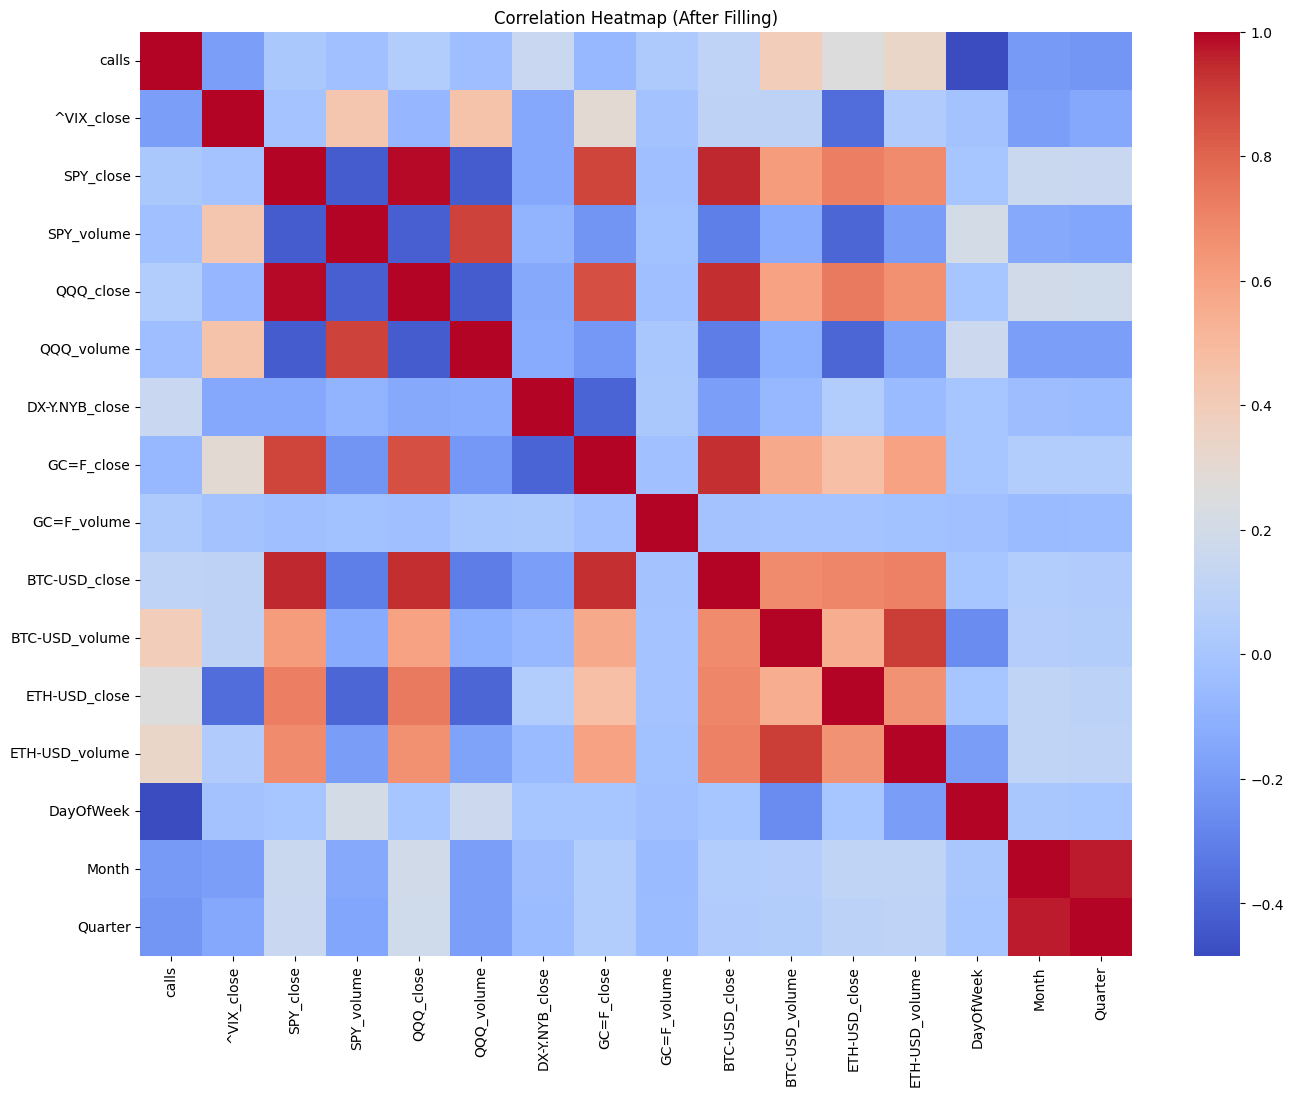


Features with |corr| > 0.2: Index(['BTC-USD_volume', 'ETH-USD_close', 'ETH-USD_volume', 'DayOfWeek',
       'Month', 'Quarter'],
      dtype='object')


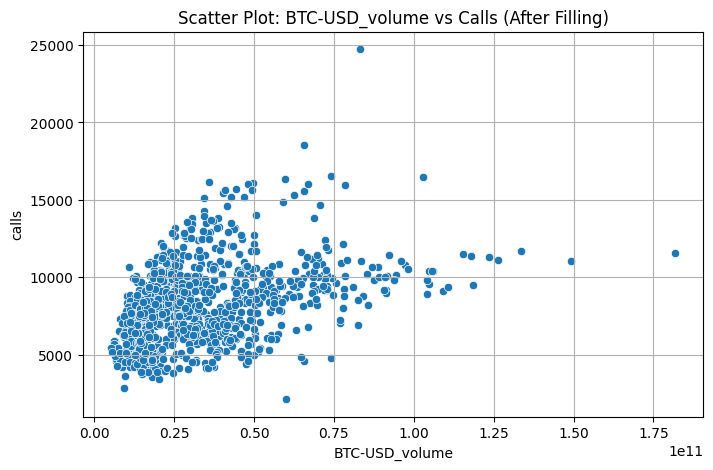

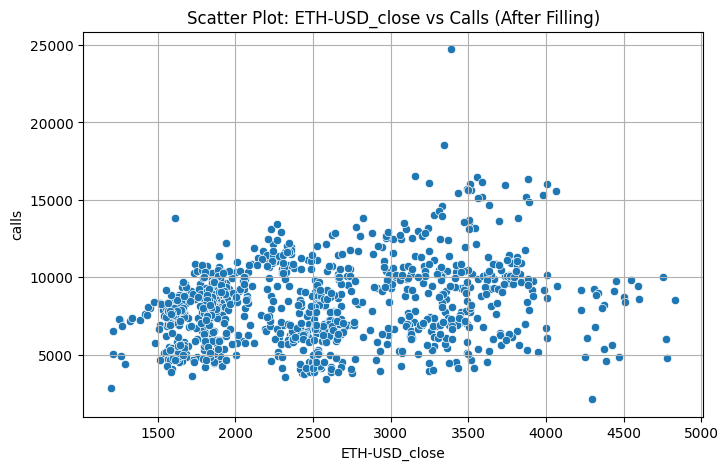

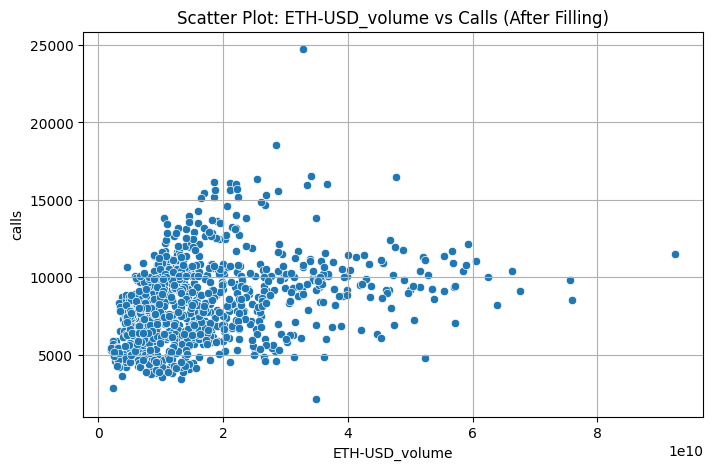

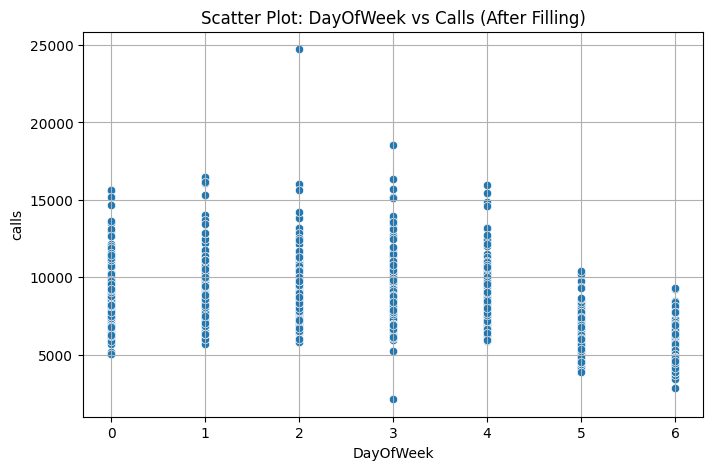

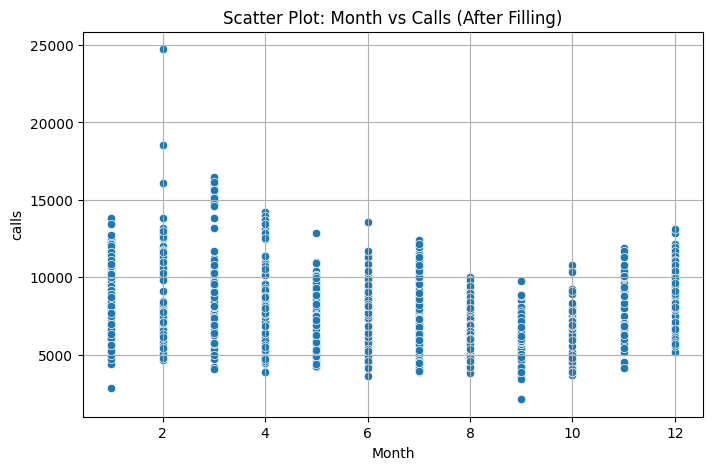

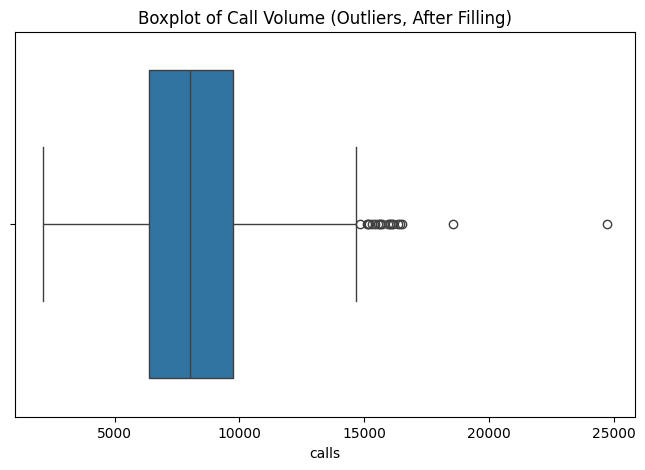


Outliers (Z-score > 3):
             calls
2024-02-27  16109
2024-02-28  24724
2024-02-29  18546
2024-03-05  16441
2024-03-13  16024
2024-03-14  16367
2024-03-15  15956
2024-03-19  16505
2024-03-20  16049
2024-03-26  16144

IQR Outliers:
             calls
2024-02-27  16109
2024-02-28  24724
2024-02-29  18546
2024-03-01  15442
2024-03-05  16441
2024-03-07  15186
2024-03-08  14858
2024-03-11  15543
2024-03-12  15327
2024-03-13  16024
2024-03-14  16367
2024-03-15  15956
2024-03-18  15646
2024-03-19  16505
2024-03-20  16049
2024-03-21  15708
2024-03-25  15173
2024-03-26  16144
2024-03-27  15641
2024-03-28  15108


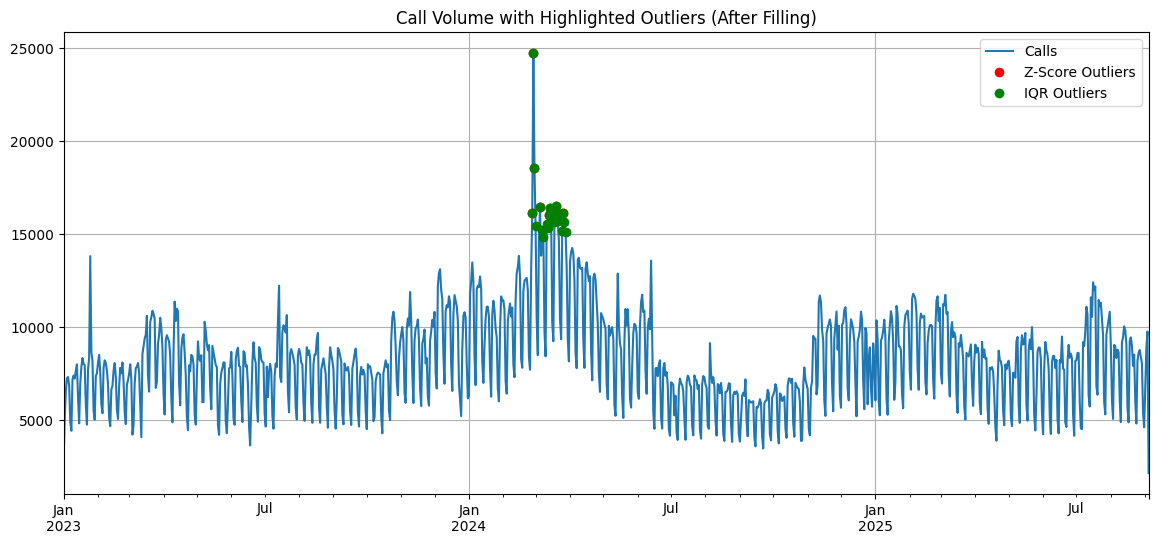


^VIX_close_^VIX not found in data, skipping VIX analysis.

CVOL-USD_Close_CVOL-USD not found in data, skipping CVOL analysis.


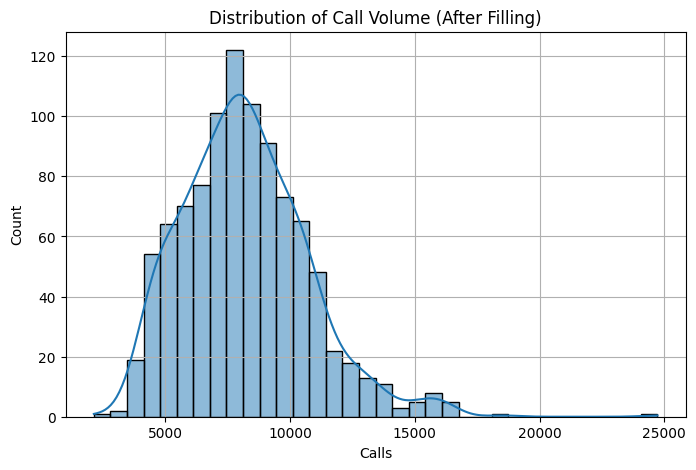


Revised EDA Complete. Data now includes filled values for weekends and holidays using forward-fill.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Step 1: Load the data from CSV file
df = pd.read_csv('final_merged_data.csv', parse_dates=['Date'], index_col='Date')

# New Step: Fill missing dates (weekends and holidays) with forward-fill from last business day
# Create full daily date range from min to max date
min_date = df.index.min()
max_date = df.index.max()
full_range = pd.date_range(start=min_date, end=max_date, freq='D')

# Reindex to full range and forward-fill all columns
df = df.reindex(full_range).ffill()

# Verify no missing dates now
print("\nAfter Filling - Missing Dates Check:")
date_range_check = pd.date_range(start=min_date, end=max_date)
missing_after = date_range_check.difference(df.index)
if missing_after.empty:
    print("No missing dates after filling.")
else:
    print("Still missing:", missing_after)

# Proceed with EDA on the filled DataFrame

# Step 2: Basic Overview
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics for Calls:\n", df['calls'].describe())
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Dates:", len(df.index.unique()))  # Check for duplicates or gaps

# Visualization for missing values (should be none after fill)
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values (After Filling)')
plt.show()

# Visualization for summary statistics (boxplot for Calls)
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['calls'])
plt.title('Boxplot Summary of Call Volume (After Filling)')
plt.ylabel('Calls')
plt.grid(True)
plt.show()

# Step 3: Visualize the Time Series
plt.figure(figsize=(14, 6))
df['calls'].plot(title='Daily Call Volume Over Time (After Filling)')
plt.xlabel('Date')
plt.ylabel('Calls')
plt.grid(True)
plt.show()

# Rolling mean and std (7-day window for weekly smoothing)
rolling_mean = df['calls'].rolling(window=7).mean()
rolling_std = df['calls'].rolling(window=7).std()

plt.figure(figsize=(14, 6))
df['calls'].plot(label='Calls', alpha=0.5)
rolling_mean.plot(label='7-Day Rolling Mean', color='red')
rolling_std.plot(label='7-Day Rolling Std', color='black')
plt.title('Call Volume with Rolling Statistics (After Filling)')
plt.xlabel('Date')
plt.ylabel('Calls')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Time Series Decomposition (assuming weekly seasonality, period=7)
decomp = seasonal_decompose(df['calls'], model='additive', period=7)
decomp.plot()
plt.suptitle('Seasonal Decomposition of Call Volume (After Filling)')
plt.show()

# Step 5: Seasonality and Patterns
# Add day of week, month, quarter
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter

# Average calls by day of week
dow_avg = df.groupby('DayOfWeek')['calls'].mean()
dow_avg.plot(kind='bar', title='Average Calls by Day of Week (After Filling)')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Average Calls')
plt.grid(True)
plt.show()

# Average calls by month
month_avg = df.groupby('Month')['calls'].mean()
month_avg.plot(kind='bar', title='Average Calls by Month (After Filling)')
plt.ylabel('Average Calls')
plt.grid(True)
plt.show()

# Average calls by quarter
quarter_avg = df.groupby('Quarter')['calls'].mean()
quarter_avg.plot(kind='bar', title='Average Calls by Quarter (After Filling)')
plt.ylabel('Average Calls')
plt.grid(True)
plt.show()

# Step 6: Autocorrelation and Partial Autocorrelation
plt.figure(figsize=(14, 6))
plot_acf(df['calls'], lags=30, title='Autocorrelation of Call Volume (After Filling)')
plt.show()

plt.figure(figsize=(14, 6))
plot_pacf(df['calls'], lags=30, title='Partial Autocorrelation of Call Volume (After Filling)')
plt.show()

# Step 7: Stationarity Test (ADF Test)
adf_result = adfuller(df['calls'])
print('\nADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])
if adf_result[1] > 0.05:
    print("Series is non-stationary (fail to reject null hypothesis)")
else:
    print("Series is stationary (reject null hypothesis)")

# Plot original and differenced series for visualization
diff_calls = df['calls'].diff().dropna()
adf_diff = adfuller(diff_calls)
print('\nADF on Differenced Series:', adf_diff[0])
print('p-value:', adf_diff[1])

plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
df['calls'].plot(title='Original Call Volume (After Filling)')
plt.grid(True)

plt.subplot(2, 1, 2)
diff_calls.plot(title='Differenced Call Volume (After Filling)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Correlations with Market Features
# Select numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()
print("\nCorrelations with Calls:\n", corr_matrix['calls'].sort_values(ascending=False))

# Heatmap of correlations
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (After Filling)')
plt.show()

# Focus on high correlations (abs > 0.2)
high_corr = corr_matrix['calls'][abs(corr_matrix['calls']) > 0.2].index.drop('calls', errors='ignore')
print("\nFeatures with |corr| > 0.2:", high_corr)

# Scatter plots for key correlated features
for col in high_corr[:5]:  # Top 5 for brevity
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[col], y=df['calls'])
    plt.title(f'Scatter Plot: {col} vs Calls (After Filling)')
    plt.grid(True)
    plt.show()

# Step 9: Outlier Detection
# Boxplot for Calls
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['calls'])
plt.title('Boxplot of Call Volume (Outliers, After Filling)')
plt.show()

# Z-score outliers
z_scores = np.abs((df['calls'] - df['calls'].mean()) / df['calls'].std())
outliers = df[z_scores > 3]
print("\nOutliers (Z-score > 3):\n", outliers[['calls']])

# IQR outliers
Q1 = df['calls'].quantile(0.25)
Q3 = df['calls'].quantile(0.75)
IQR = Q3 - Q1
iqr_outliers = df[(df['calls'] < (Q1 - 1.5 * IQR)) | (df['calls'] > (Q3 + 1.5 * IQR))]
print("\nIQR Outliers:\n", iqr_outliers[['calls']])

# Visualization: Highlight outliers in time series
plt.figure(figsize=(14, 6))
df['calls'].plot(label='Calls')
outliers['calls'].plot(style='ro', label='Z-Score Outliers')
iqr_outliers['calls'].plot(style='go', label='IQR Outliers')
plt.title('Call Volume with Highlighted Outliers (After Filling)')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Additional Analysis - High/Low Volatility Days (conditional on column existence)
vix_col = '^VIX_close_^VIX'
if vix_col in df.columns:
    # Example: Average calls on high VIX days (>20) vs low
    high_vix = df[df[vix_col] > 20]['calls'].mean()
    low_vix = df[df[vix_col] <= 20]['calls'].mean()
    print(f"\nAvg Calls on High VIX (>20): {high_vix}")
    print(f"Avg Calls on Low VIX (<=20): {low_vix}")

    # Bar plot for comparison
    plt.figure(figsize=(8, 5))
    sns.barplot(x=['High VIX (>20)', 'Low VIX (<=20)'], y=[high_vix, low_vix])
    plt.title('Average Calls by VIX Level (After Filling)')
    plt.ylabel('Average Calls')
    plt.grid(True)
    plt.show()
else:
    print(f"\n{vix_col} not found in data, skipping VIX analysis.")

cvol_col = 'CVOL-USD_Close_CVOL-USD'
if cvol_col in df.columns:
    # Similarly for CVOL-USD
    median_cvol = df[cvol_col].median()
    high_cvol = df[df[cvol_col] > median_cvol]['calls'].mean()
    low_cvol = df[df[cvol_col] <= median_cvol]['calls'].mean()
    print(f"Avg Calls on High CVOL: {high_cvol}")
    print(f"Avg Calls on Low CVOL: {low_cvol}")

    # Bar plot for CVOL comparison
    plt.figure(figsize=(8, 5))
    sns.barplot(x=['High CVOL', 'Low CVOL'], y=[high_cvol, low_cvol])
    plt.title('Average Calls by CVOL Level (After Filling)')
    plt.ylabel('Average Calls')
    plt.grid(True)
    plt.show()
else:
    print(f"\n{cvol_col} not found in data, skipping CVOL analysis.")

# Step 11: Distribution Analysis
plt.figure(figsize=(8, 5))
sns.histplot(df['calls'], kde=True)
plt.title('Distribution of Call Volume (After Filling)')
plt.xlabel('Calls')
plt.grid(True)
plt.show()

# Log-transformed if skewed
if df['calls'].skew() > 1:
    plt.figure(figsize=(8, 5))
    sns.histplot(np.log1p(df['calls']), kde=True)
    plt.title('Log-Transformed Distribution of Call Volume (After Filling)')
    plt.xlabel('Log(Calls + 1)')
    plt.grid(True)
    plt.show()

print("\nRevised EDA Complete. Data now includes filled values for weekends and holidays using forward-fill.")

# Save the updated DataFrame to a new CSV file
df.to_csv('updated_final_merged_data.csv', index=True)

In [2]:
# Save the updated DataFrame to a new CSV file
df.to_csv('updated_final_merged_data.csv', index=True)

## EDA Summary

Based on the Exploratory Data Analysis performed on the daily call volume data, here is a summary of the key findings:

### Data Overview and Missing Values
- The dataset contains 978 days of data with 14 columns, including 'calls' and various market indicators.
- Missing dates (weekends and holidays) were successfully filled using the forward-fill method, resulting in a complete time series without gaps.
- A few missing values remain in some of the market feature columns, which should be considered for handling in subsequent modeling steps.

### Call Volume Trends and Seasonality
- The time series plot shows a clear upward trend in call volume, with noticeable peaks and troughs.
- The 7-day rolling mean and standard deviation plots confirm the trend and suggest some level of heteroscedasticity (changing variance) over time.
- Seasonal decomposition reveals a strong weekly seasonality, with a clear pattern repeating every 7 days. This is further supported by the average calls by day of the week, showing significantly lower calls on weekends.
- There is also some monthly and quarterly seasonality, with March and the first quarter generally showing higher average call volumes.

### Stationarity
- The Augmented Dickey-Fuller (ADF) test on the original 'calls' series indicates that the series is non-stationary (p-value > 0.05).
- The ADF test on the differenced series (`df['calls'].diff()`) shows that the differenced series is stationary (p-value < 0.05), suggesting that differencing is a suitable transformation for achieving stationarity.

### Autocorrelation and Partial Autocorrelation
- The Autocorrelation Function (ACF) plot shows significant autocorrelation at various lags, confirming the presence of trends and seasonality.
- The Partial Autocorrelation Function (PACF) plot helps in identifying the order of autoregressive models.

### Correlations with Market Features
- The correlation matrix shows varying degrees of correlation between 'calls' and other features.
- 'DayOfWeek' has a strong negative correlation with 'calls', as expected due to lower weekend call volumes.
- 'Month' and 'Quarter' also show negative correlations, aligning with the observed seasonality.
- Cryptocurrency volumes (BTC-USD_volume and ETH-USD_volume) show the strongest positive correlations with 'calls' among the market indicators analyzed. ETH-USD_close also shows a moderate positive correlation.
- Other market indicators like VIX, SPY, QQQ, DX-Y.NYB, and GC=F show weaker correlations with 'calls'.

### Outlier Detection
- Boxplots and Z-score/IQR methods identified several outliers in the call volume data, particularly high values concentrated around late February and March 2024. These outliers should be investigated further or handled appropriately during modeling.

### Distribution Analysis
- The distribution of call volume is right-skewed, indicating a higher frequency of lower call volumes and fewer instances of very high call volumes.
- A log transformation was suggested and visualized as a potential way to make the distribution more symmetric if needed for certain modeling techniques.

Overall, the EDA highlights the strong seasonality and trend in call volume, its non-stationary nature, the influence of the day of the week, month, and quarter, and significant correlations with cryptocurrency market activity. These insights will be crucial for selecting and building an appropriate time series forecasting model.